In [1]:
# global imports
import pandas as pd
from matplotlib import pyplot
import numpy as np
import pycwt as wavelet

In [2]:
# graphic cleanup and initialization function
def initPyPlot(h=8):
    pyplot.close()
    figprops = dict(figsize=(11,h), dpi=96)
    fig = pyplot.figure(**figprops)
    return pyplot.axes()

In [3]:
# CWT calculation function
# parameters: t=time array, s=data series
def calculateCWT(t,s):
    mother = wavelet.Morlet(6)
    deltaT=t[1]-t[0]
    dj = 1 / 12           # Twelve sub-octaves per octaves
    s0 = 2 * deltaT       # Starting scale, here 2 months
    wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(ssn, deltaT, dj, s0, -1, mother)
    # Normalized wavelet power spectra
    power = (np.abs(wave)) ** 2
    return power,scales,coi

In [4]:
# load dataset from CSV
series = pd.read_csv('data/SN_m_tot_V2.0.csv',sep=';',usecols=['DATEFRACTION','SSN'])
ssn=series['SSN']
time=series['DATEFRACTION']

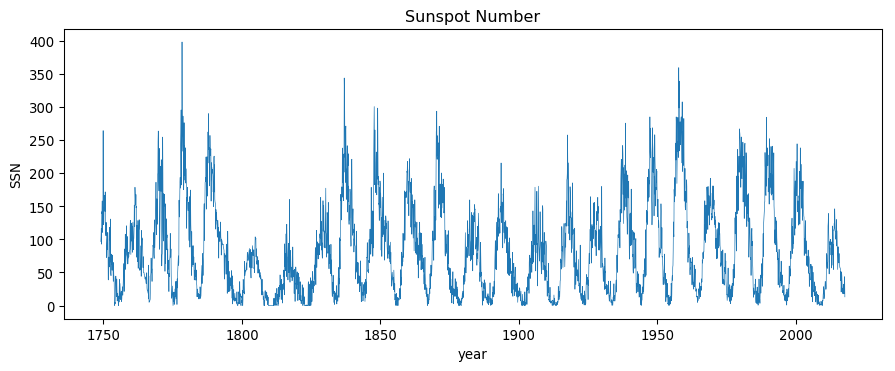

In [5]:
### SSN plot
ssnx=initPyPlot(4)
ssnx.plot(time,ssn,linewidth=0.5,antialiased=True)
ssnx.set_title('Sunspot Number')
ssnx.set_ylabel('SSN')
ssnx.set_xlabel('year')
pyplot.show()

In [6]:
# calculate CWT
# results: normalized power spectra, scales (periods per Y coordinate), cone of interest
power,scales,coi=calculateCWT(time,ssn)

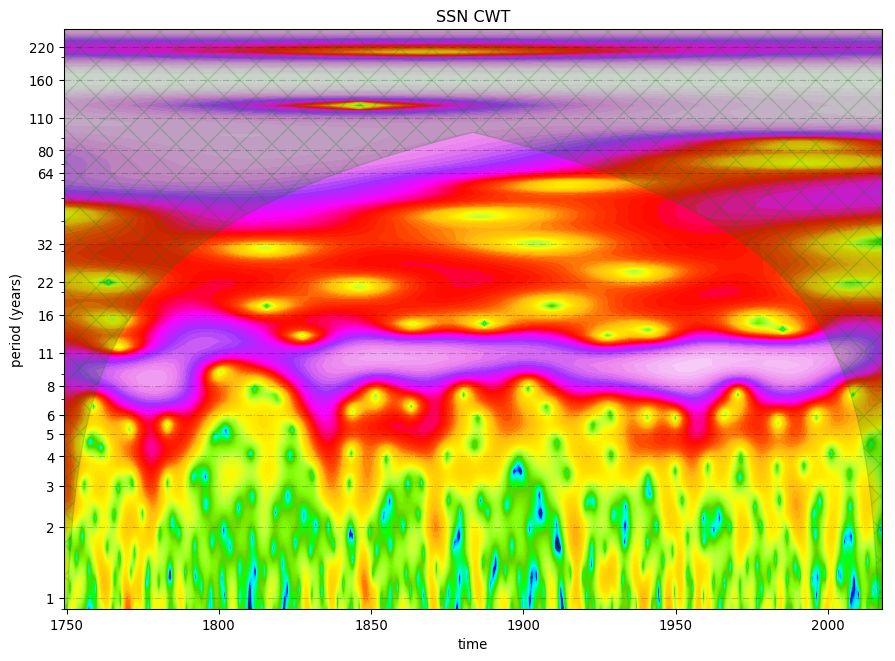

In [9]:
### CWT plot
zx = initPyPlot()
# cut out very small powers
LP2=np.log2(power)
LP2=np.clip(LP2,0,np.max(LP2))
# draw the CWT
zx.contourf(time, scales, LP2, 128, cmap=pyplot.cm.gist_ncar)
# draw the COI
coicoi=np.clip(coi,0,coi.max())
zx.fill_between(time,coicoi,scales.max(),alpha=0.2, color='g', hatch='x')
# Y-AXIS labels
yt=[0.5,1,2,3,4,5,6,8,11,16,22,32,64,80,110,160,220]
zx.set_yscale('log')
zx.set_yticks(yt)
zx.set_yticklabels(yt)
zx.grid(b=None, which='major', axis='y', alpha=0.2, antialiased=True, c='k', linestyle='-.')
# exclude <1y periods
ylim = zx.get_ylim()
zx.set_ylim(0.9,ylim[1]-0.5)
# strings
zx.set_title('SSN CWT')
zx.set_ylabel('period (years)')
zx.set_xlabel('time')
# print all
pyplot.show()